In [105]:
import re
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
path = pathlib.Path().absolute().parent.as_posix() + "/data/raw/Twitter_Data.csv"

df = pd.read_csv(path)
df.sample(4)

,clean_text,category
71190,hours after prime minister narendra modi annou...,1.0
68477,big salute modi make feel proud doing marvelou...,1.0
27881,jai hind country wants modi once again and bjp...,1.0
72025,has proof then could face the case more over m...,1.0


In [107]:
df.shape

(162980, 2)

In [108]:
df['category'].value_counts()

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [110]:
# drop rows having NA data
df[df['clean_text'].isna()].index

Index([148, 158694, 159443, 160560], dtype='int64')

In [111]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [112]:
df = df.dropna()

In [113]:
df.isna().sum()

clean_text    0
category      0
dtype: int64

In [114]:
df.duplicated().sum()

np.int64(0)

In [115]:
df = df.drop_duplicates()

In [116]:
df = df[~(df['clean_text'].str.strip() == '')]

In [117]:
df['clean_text'] = df['clean_text'].str.lower()

In [118]:
df[df['clean_text'].apply(lambda x: x.endswith(' ') or x.startswith(' '))].shape

(79451, 2)

In [119]:
df['clean_text'] = df['clean_text'].str.strip()

In [120]:
# drop comment having URL's
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

df[df['clean_text'].str.contains(url_pattern, regex=True)]

,clean_text,category


In [121]:
df[df['clean_text'].str.contains('\n')]

,clean_text,category
32,modi govts slashing indias education budget cl...,-1.0
46,modi govt has done remarkable job making corru...,1.0
59,all are with you sir namo again jai hind jai m...,0.0
63,this new india this indias century because has...,1.0
71,what your logic sir\ncould you please throw so...,0.0
...,...,...
162898,every regional party after bagging more seats ...,1.0
162901,what south doesnt offer much seatssoutherners ...,1.0
162906,have two options this elections choose from\n…...,1.0
162917,conversation between modi ceo tv9\nmodi youve ...,0.0


In [122]:
df['clean_text'] = df['clean_text'].str.replace('\n', ' ')

In [123]:
# remove '"-
# for i in df.sample(50)['clean_text'] :
#     print('' + i)

In [124]:
emoji_pattern = re.compile("["
                           "\U0001F600-\U0001F64F"  # Emoticons
                           "\U0001F300-\U0001F5FF"  # Miscellaneous Symbols and Pictographs
                           "\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                           "\U0001F1E6-\U0001F1FF"  # Flags
                           "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           "\U00002600-\U000026FF"  # Miscellaneous Symbols
                           "\U00002700-\U000027BF"  # Dingbats
                           "]+", flags=re.UNICODE)

In [125]:
# check any emoji in comment
emoji_index = df[df['clean_text'].apply(lambda x: bool(emoji_pattern.search(x)))].index

In [126]:
# drop row having emojis
df = df.drop(index=emoji_index)

In [127]:
# removing emojis
df['clean_text'] = df['clean_text'].apply(lambda x: emoji_pattern.sub(r'', x))

In [128]:
hindi_pattern = re.compile(r'[\u0900-\u097F]')

# check any hindi character in comment
hindi_index = df[df['clean_text'].apply(lambda x: bool(hindi_pattern.search(x)))].index

In [129]:
df['clean_text'] = df['clean_text'].apply(lambda x: hindi_pattern.sub(r'', x))

In [130]:
# drop comment having hindi characters
df = df.drop(index=hindi_index)

In [131]:
df.shape

(159831, 2)

In [132]:
# remove links before next step

In [133]:
# here everytime we need to search for that character in data and then remove it
# df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[.,"-\'’،‘–]', '', x))

# it'll remove emoji, hindi characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s₹!?.,]', '', x))

In [134]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

In [135]:
df['char_count'] = df['clean_text'].apply(lambda x: len(x.replace(' ', '')))

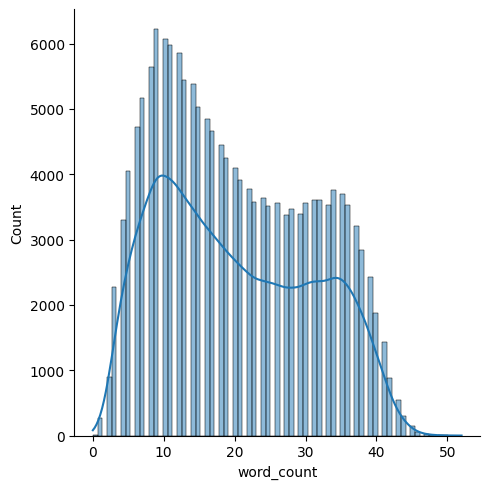

In [136]:
sns.displot(df['word_count'], kde=True)

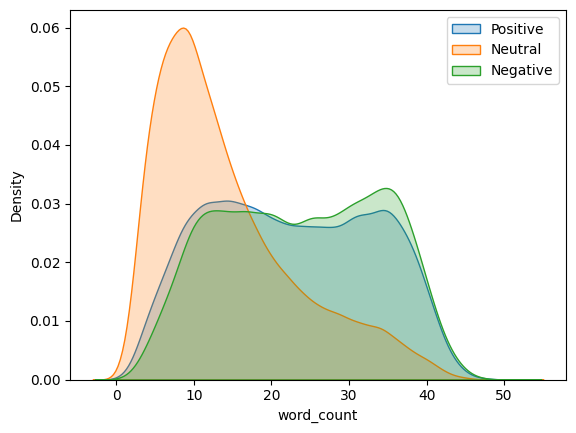

In [137]:
sns.kdeplot(df[df['category'] == 1]['word_count'], label = 'Positive', fill=True)
sns.kdeplot(df[df['category'] == 0]['word_count'], label = 'Neutral', fill=True)
sns.kdeplot(df[df['category'] == -1]['word_count'], label = 'Negative', fill=True)

plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='count'>

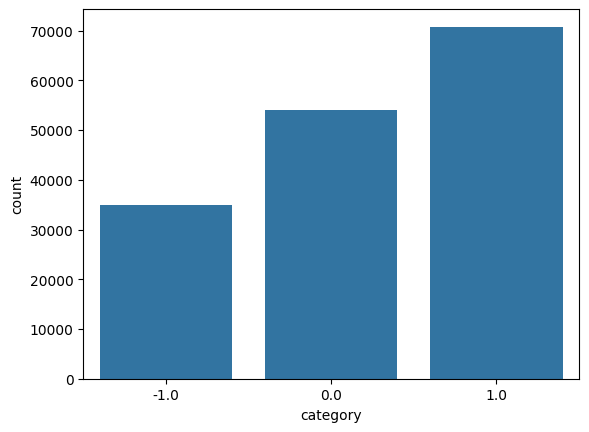

In [138]:
sns.countplot(df, x='category')

In [139]:
df['category'].value_counts(normalize=True) * 100 

category
 1.0    44.288029
 0.0    33.855134
-1.0    21.856836
Name: proportion, dtype: float64

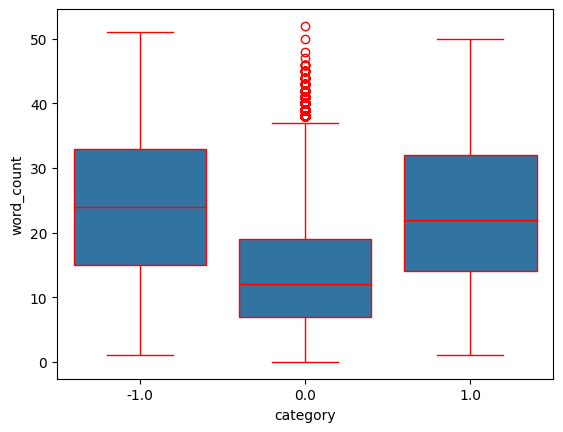

In [140]:
sns.boxplot(data=df, x='category', y='word_count', linecolor='red')
plt.show()

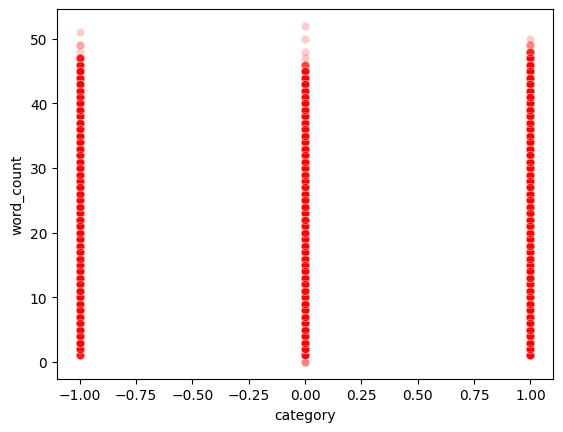

In [141]:
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.2, color='red')
plt.show()

In [142]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = set(stopwords.words('english')) - {"not", "no", "never", "none", "n't", "nothing", "nobody", "nowhere", "neither", "but", "however", "yet"}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [143]:
df['stopwords_count'] = df['clean_text'].apply(lambda x: len([i for i in x.split() if i in stopwords]))

In [144]:
df.sample(5)

,clean_text,category,word_count,char_count,stopwords_count
121461,mostly fake followers modi,-1.0,4,23,0
126055,our allies the nda will also win more seats pe...,1.0,20,90,8
127456,chalo sankalp kare hamara lakhsya majboot sark...,1.0,32,170,3
43532,narendra modi mission shakti operation was dif...,1.0,17,112,3
81844,modi report card part two ten economic stats s...,1.0,10,52,0


In [145]:
# most used stopwords
stopwords_lst = [word for sentence in df['clean_text'] for word in sentence.split() if word in stopwords]

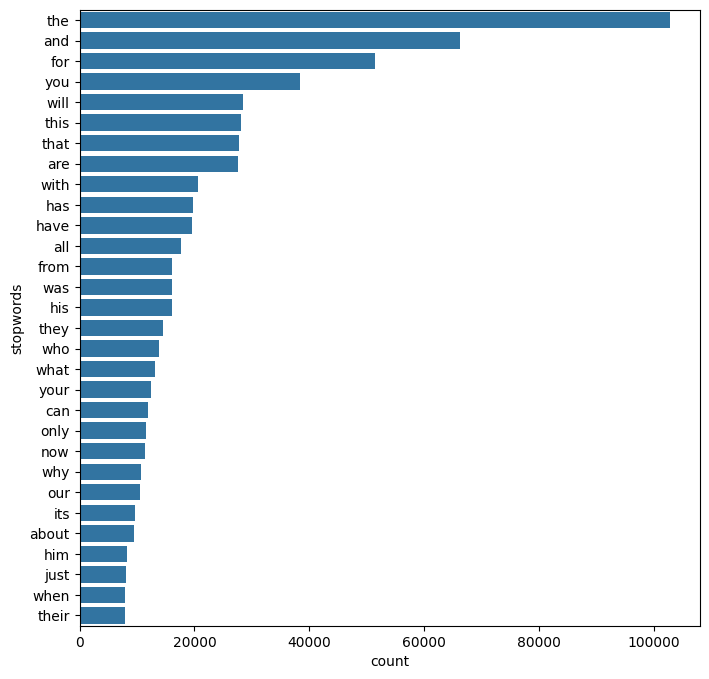

In [146]:
from collections import Counter

most_common_30 = Counter(stopwords_lst).most_common(30)

most_freq_stopwords = pd.DataFrame(most_common_30, columns=['stopwords', 'count'])

plt.figure(figsize=(8, 8))
sns.barplot(data=most_freq_stopwords, x='count', y='stopwords')
plt.show()

In [148]:
# removing all stopwords
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([i for i in x.split() if i not in stopwords]))

In [149]:
characters = ''.join(df['clean_text'])
char_feq = Counter(characters)
char_feq 

Counter({' ': 2177037,
         'e': 1436992,
         'i': 1194961,
         'a': 1170268,
         'o': 1003231,
         'n': 984379,
         't': 950715,
         's': 909297,
         'r': 824007,
         'd': 696120,
         'l': 580181,
         'm': 528289,
         'c': 455188,
         'p': 391604,
         'h': 365880,
         'u': 353345,
         'g': 348258,
         'y': 234887,
         'b': 209938,
         'k': 189403,
         'v': 178766,
         'w': 169603,
         'f': 143823,
         'j': 66434,
         '0': 38343,
         '2': 22702,
         '1': 22701,
         'x': 20462,
         'z': 12596,
         'q': 10420,
         '4': 8610,
         '9': 8003,
         '5': 5314,
         '3': 5130,
         '7': 4430,
         '6': 3371,
         '8': 2825,
         '₹': 629})

In [151]:
# remove unnecessary characetrs
df['clean_text'] = df['clean_text'].str.replace('\xa0', ' ')
df['clean_text'] = df['clean_text'].str.replace('\u2009', ' ')
df['clean_text'] = df['clean_text'].str.replace('\u200a', ' ')
df['clean_text'] = df['clean_text'].str.replace('\r', ' ')

# remove excessive space and replace with single space
df['clean_text'] = df['clean_text'].str.replace(r'\s+', ' ', regex=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4232\3042420152.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


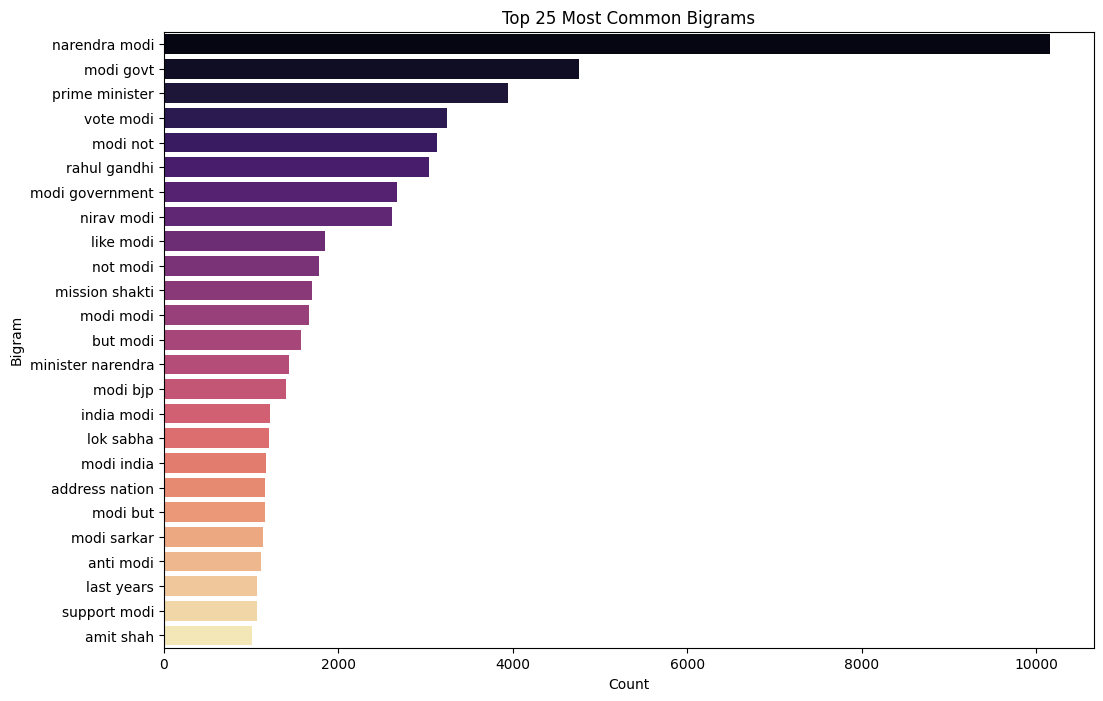

In [152]:
# bi-gram & tri-gram analysis

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(ngram_range=(2,2), stop_words=list(stopwords)).fit(df['clean_text'])
bag_of_words = vec.transform(df['clean_text'])
sum_words = bag_of_words.sum(axis=0)
word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(word_freq[:25], columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4232\3227476168.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='mako')


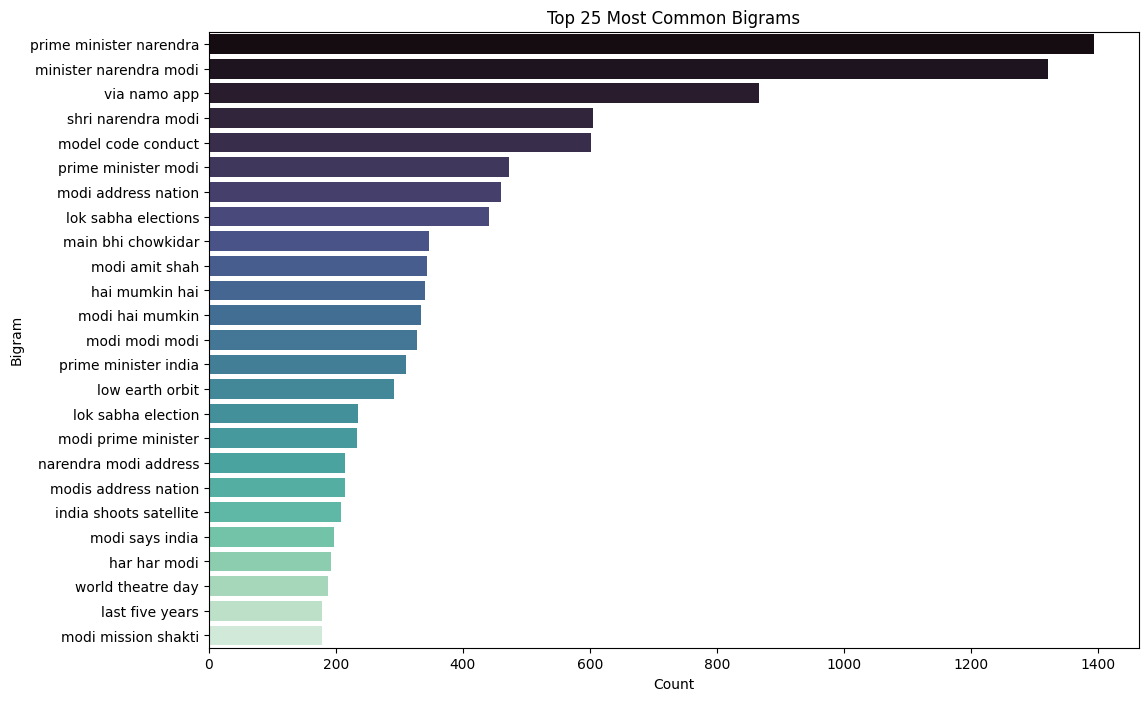

In [153]:
vec = CountVectorizer(ngram_range=(3,3), stop_words=list(stopwords)).fit(df['clean_text'])
bag_of_words = vec.transform(df['clean_text'])
sum_words = bag_of_words.sum(axis=0)
word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Convert the bigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(word_freq[:25], columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='mako')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

In [154]:
df.sample(3)

,clean_text,category,word_count,char_count,stopwords_count
6058,modi take credit beg votes,0.0,12,45,7
96576,india long way another star war superpower sta...,-1.0,22,104,2
154564,current modi government government people peop...,1.0,15,89,7


In [155]:
summary = ' '.join(df['clean_text'])

In [156]:
char_frequency = Counter(summary)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
4,,2336867
8,e,1436992
3,i,1194961
14,a,1170268
1,o,1003231
9,n,984379
13,t,950715
7,s,909297
6,r,824007
2,d,696120


In [157]:
df.columns

Index(['clean_text', 'category', 'word_count', 'char_count',
       'stopwords_count'],
      dtype='object')

In [158]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_text'] = df['clean_text'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.sample(3)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...


,clean_text,category,word_count,char_count,stopwords_count
0,modi promised minimum government maximum gover...,-1.0,33,176,11
1,talk nonsense continue drama vote modi,0.0,13,55,7
2,say vote modi welcome bjp told rahul main camp...,1.0,22,95,9
3,asking supporter prefix chowkidar name modi gr...,1.0,34,179,14
4,answer among powerful world leader today trump...,1.0,14,67,4


In [199]:
text = ' '.join(df['clean_text']).lower()
# most_common_500 = " ".join([i for i, j in Counter(text.split()).most_common(500)])
# most_common_500
dict(Counter(text.split()).most_common(500))

{'modi': 152732,
 'india': 30353,
 'not': 28865,
 'but': 18267,
 'bjp': 14353,
 'people': 14203,
 'like': 12742,
 'congress': 12676,
 'election': 11470,
 'narendra': 11217,
 'vote': 10685,
 'govt': 9860,
 'one': 9484,
 'indian': 9210,
 'say': 9022,
 'year': 8994,
 'time': 8693,
 'country': 8529,
 'dont': 8255,
 'modis': 7591,
 'nation': 7234,
 'know': 7227,
 'rahul': 7110,
 'want': 7033,
 'even': 6653,
 'also': 6398,
 'get': 6378,
 'party': 6219,
 'government': 6139,
 'give': 6026,
 'gandhi': 5836,
 'power': 5783,
 'minister': 5702,
 'leader': 5345,
 'make': 5280,
 'good': 5219,
 'space': 5031,
 'come': 5020,
 'need': 5016,
 'would': 5001,
 'credit': 4978,
 'money': 4943,
 'take': 4931,
 'see': 4930,
 'said': 4900,
 'hai': 4823,
 'think': 4749,
 'pakistan': 4707,
 'done': 4690,
 'work': 4564,
 'sir': 4546,
 'prime': 4362,
 'job': 4354,
 'every': 4312,
 'day': 4253,
 'support': 4243,
 'back': 4205,
 'scientist': 4189,
 'win': 4118,
 'via': 4105,
 'chowkidar': 4068,
 'never': 4065,
 'opp

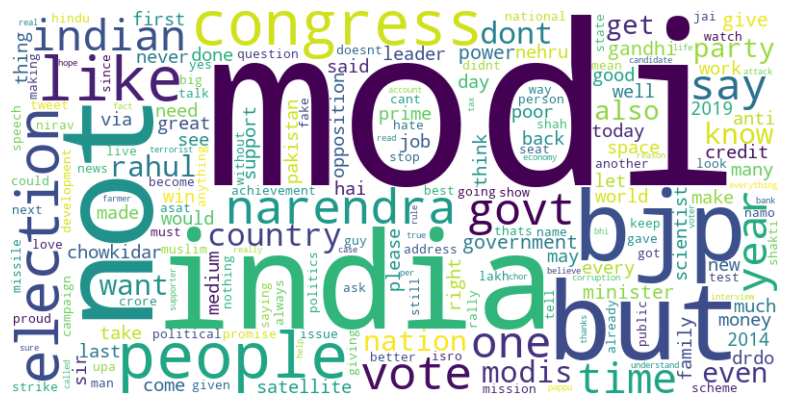

In [201]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def plot_word_cloud(text):
    text = ' '.join(text).lower()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(Counter(text.split()).most_common(500)))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_text'])

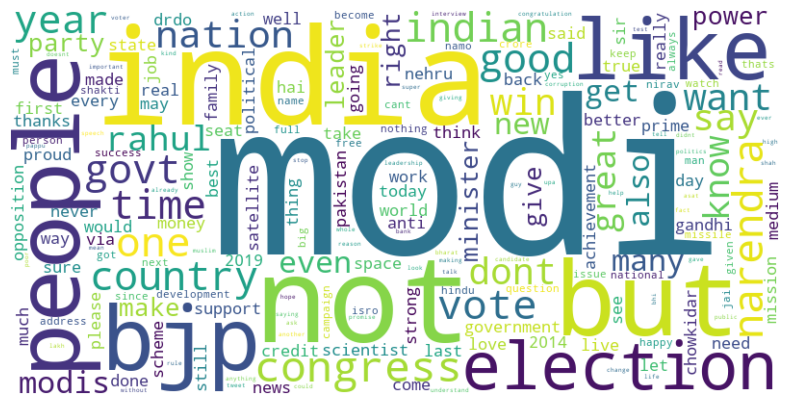

In [202]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    text = ' '.join(text).lower()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(Counter(text.split()).most_common(500)))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_text'])

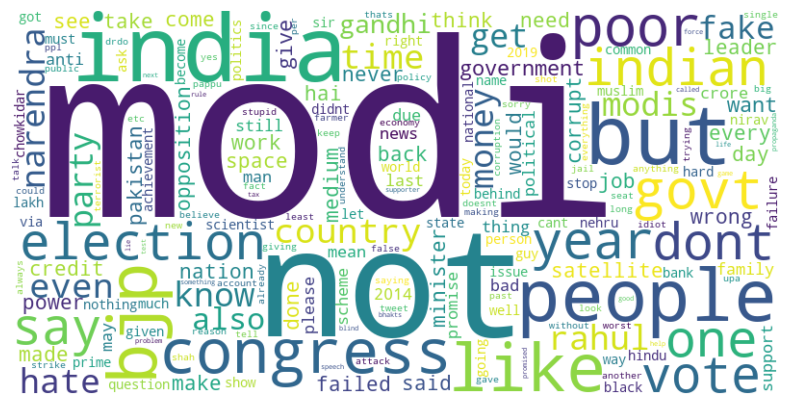

In [203]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    text = ' '.join(text).lower()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(Counter(text.split()).most_common(500)))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_text'])

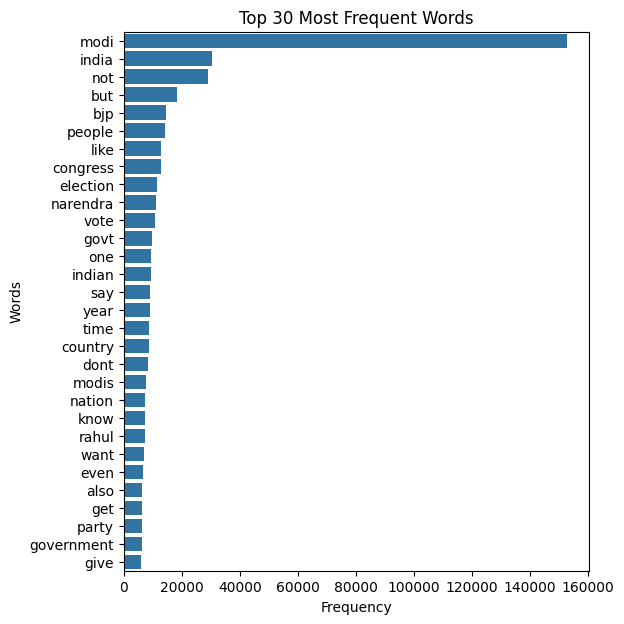

In [208]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_text']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(6, 7))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=30)


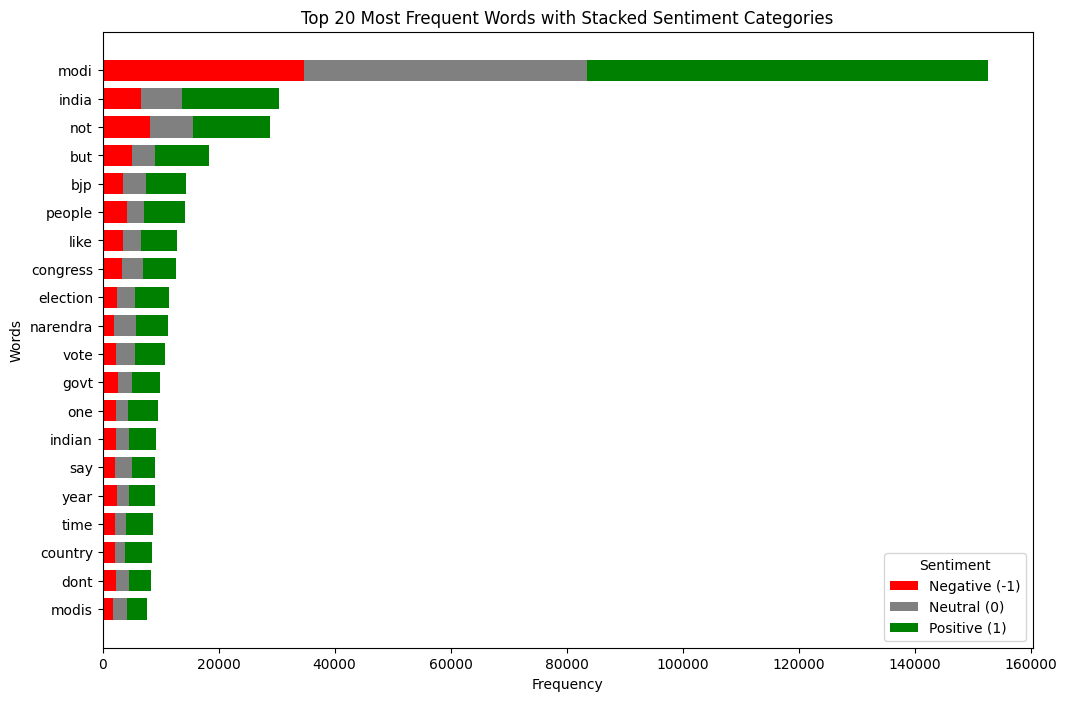

In [209]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_text'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)
